<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import requests
from tqdm.notebook import tqdm
from urllib.parse import urlparse
import sqlite3

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

file_name = urlparse(file_path).path.strip('/').split('/')[-1]

### Step 2: Import necessary libraries and load the dataset


### Load the data


In [3]:
# Load the Stack Overflow survey dataset
df = pd.read_csv(file_name)

### Display the first few rows of the data to understand its structure


In [4]:
# Display the first few rows of the dataset
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.00,Agree,Disagree,Agree,Agree,Agree,Neither agree nor dis

### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



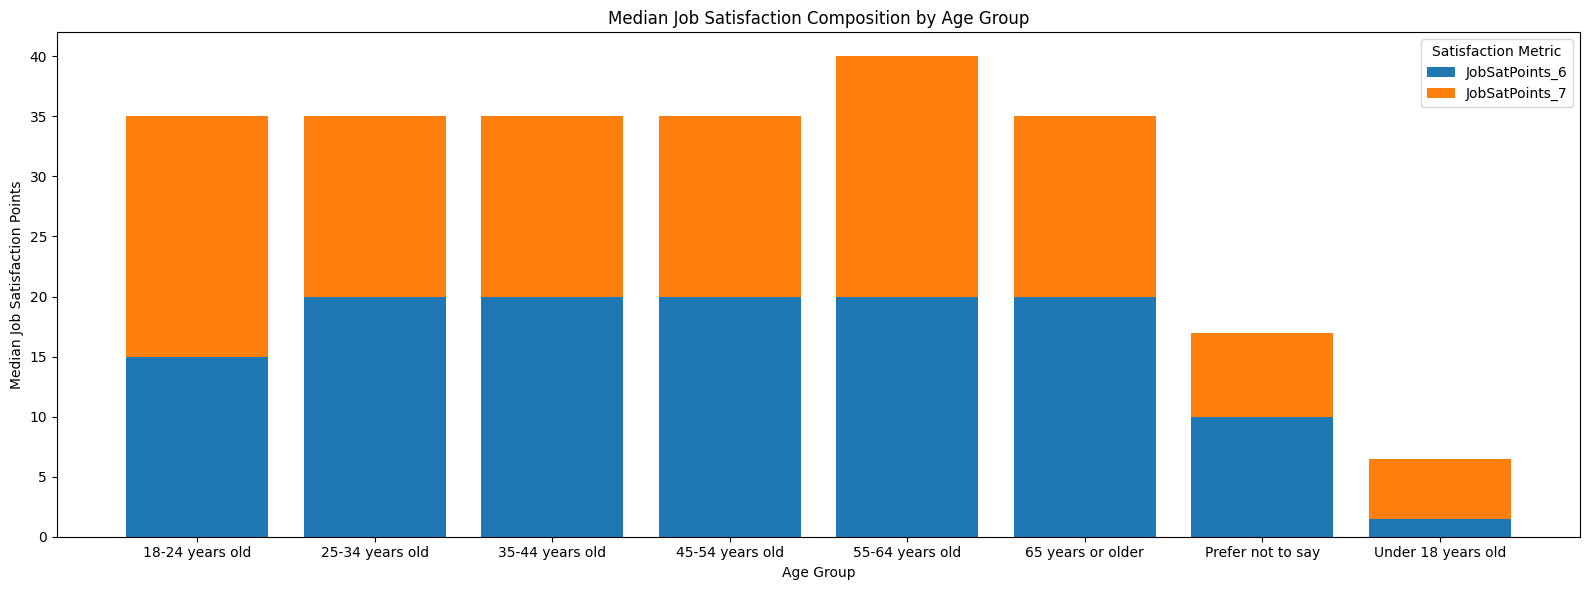

In [5]:
df_1 = df.copy().loc[:,["Age", "JobSatPoints_6", "JobSatPoints_7"]].dropna()
median_df = df_1.groupby(by="Age", as_index=False).agg({"JobSatPoints_6":"median", "JobSatPoints_7":"median"})

plt.figure(figsize=(16, 6))
plt.bar(
    x=median_df["Age"],
    height=median_df["JobSatPoints_6"],
    bottom=None,
    label="JobSatPoints_6",
    color="tab:blue",
    width=0.8,
    align="center"
)

plt.bar(
    x=median_df["Age"],
    height=median_df["JobSatPoints_7"],
    bottom=median_df["JobSatPoints_6"],
    label="JobSatPoints_7",
    color="tab:orange",
    width=0.8,
    align="center"
)

plt.xlabel(xlabel="Age Group")
plt.ylabel(ylabel="Median Job Satisfaction Points")
plt.title(label="Median Job Satisfaction Composition by Age Group")
plt.legend(loc='upper right', title='Satisfaction Metric')
plt.tight_layout()

plt.savefig("Lab 22 Plots/Task 1-1 Median Job Satisfaction Composition by Age Group")
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


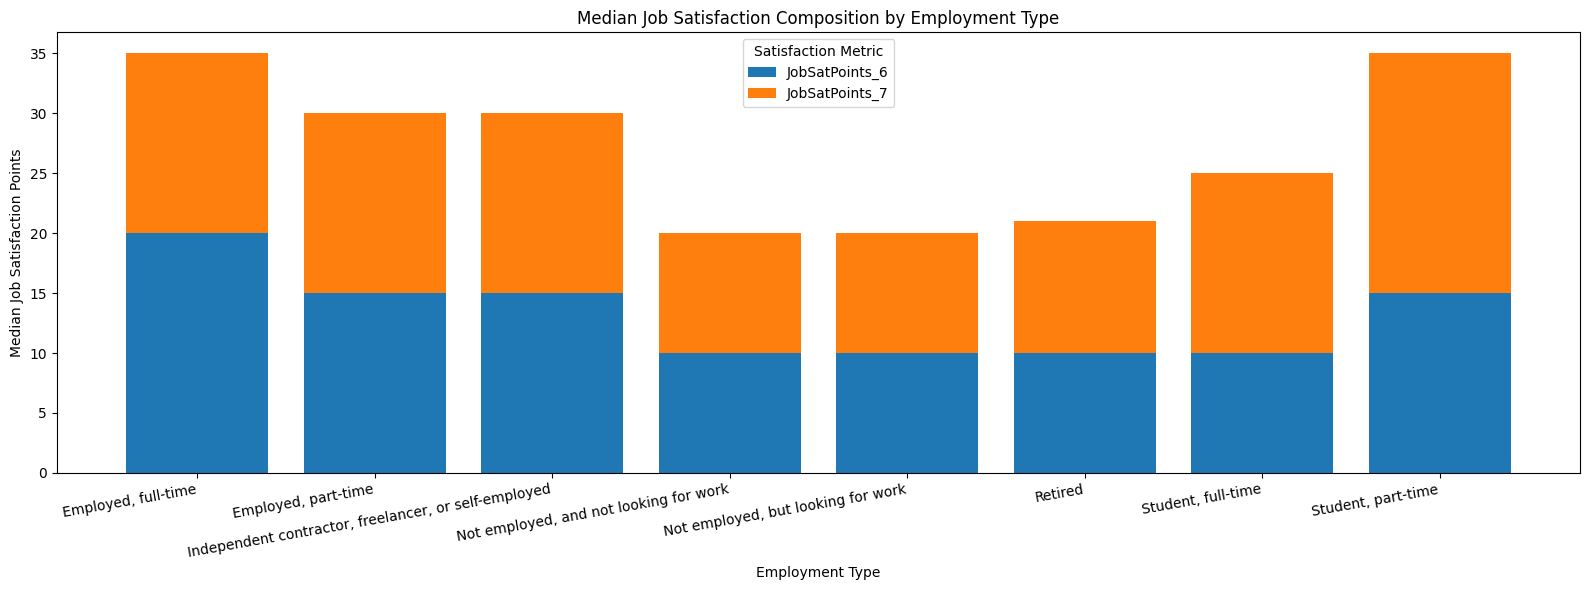

In [6]:
df_2 = df.copy().loc[:,["Employment", "JobSatPoints_6", "JobSatPoints_7"]].dropna()
df_2["Employment"] = df_2["Employment"].str.split(";")
df_2_exploded = df_2.explode("Employment")
median_df = df_2_exploded.groupby(by="Employment", as_index=False).agg({"JobSatPoints_6":"median", "JobSatPoints_7":"median"})

plt.figure(figsize=(16, 6))
plt.bar(
    x=median_df["Employment"],
    height=median_df["JobSatPoints_6"],
    bottom=None,
    label="JobSatPoints_6",
    color="tab:blue",
    width=0.8,
    align="center"
)

plt.bar(
    x=median_df["Employment"],
    height=median_df["JobSatPoints_7"],
    bottom=median_df["JobSatPoints_6"],
    label="JobSatPoints_7",
    color="tab:orange",
    width=0.8,
    align="center"
)

plt.xlabel(xlabel="Employment Type")
plt.xticks(rotation=10, ha="right")
plt.ylabel(ylabel="Median Job Satisfaction Points")
plt.title(label="Median Job Satisfaction Composition by Employment Type")
plt.legend(loc='best', title='Satisfaction Metric')
plt.tight_layout()

plt.savefig("Lab 22 Plots/Task 1-2 Median Job Satisfaction Composition by Employment Type")
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


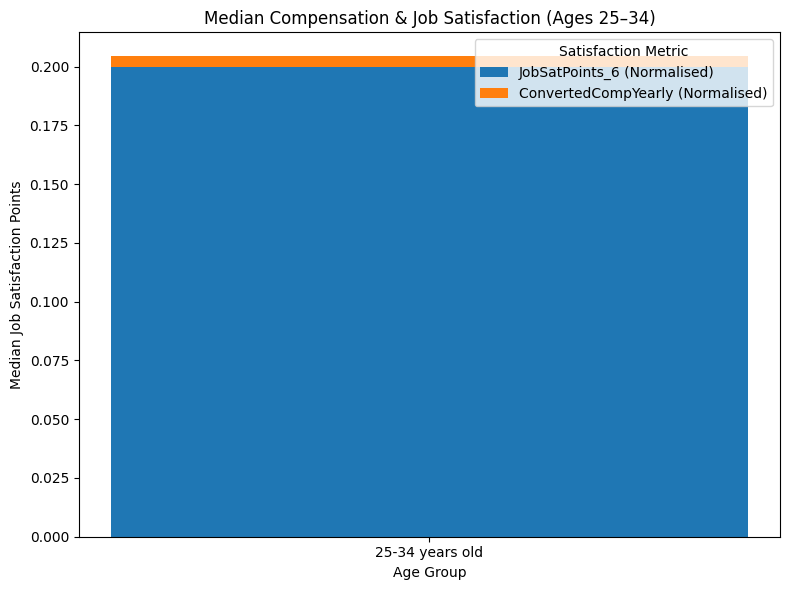

In [7]:
df_3 = df.copy().loc[df["Age"] == "25-34 years old", ["Age", "JobSatPoints_6", "ConvertedCompYearly"]].dropna()

# Normalize JobSatPoints_6 and ConvertedCompYearly
df_3['JobSatPoints_6_normalized'] = (df_3['JobSatPoints_6'] - df_3['JobSatPoints_6'].min()) / (df_3['JobSatPoints_6'].max() - df_3['JobSatPoints_6'].min())
df_3['ConvertedCompYearly_normalized'] = (df_3['ConvertedCompYearly'] - df_3['ConvertedCompYearly'].min()) / (df_3['ConvertedCompYearly'].max() - df_3['ConvertedCompYearly'].min())

# Group by 'AgeGroups2' and calculate the median
median_df = df_3.groupby('Age', as_index=False).agg({"JobSatPoints_6_normalized":"median", "ConvertedCompYearly_normalized":"median"})

plt.figure(figsize=(8, 6))
plt.bar(
    x=median_df["Age"],
    height=median_df["JobSatPoints_6_normalized"],
    bottom=None,
    label="JobSatPoints_6 (Normalised)",
    color="tab:blue",
    width=0.8,
    align="center"
)

plt.bar(
    x=median_df["Age"],
    height=median_df["ConvertedCompYearly_normalized"],
    bottom=median_df["JobSatPoints_6_normalized"],
    label="ConvertedCompYearly (Normalised)",
    color="tab:orange",
    width=0.8,
    align="center"
)

plt.xlabel(xlabel="Age Group")
plt.ylabel(ylabel="Median Job Satisfaction Points")
plt.title(label="Median Compensation & Job Satisfaction (Ages 25–34)")
plt.legend(loc='upper right', title='Satisfaction Metric')
plt.tight_layout()

plt.savefig("Lab 22 Plots/Task 2-1 Median Compensation & Job Satisfaction (Ages 25–34)")
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


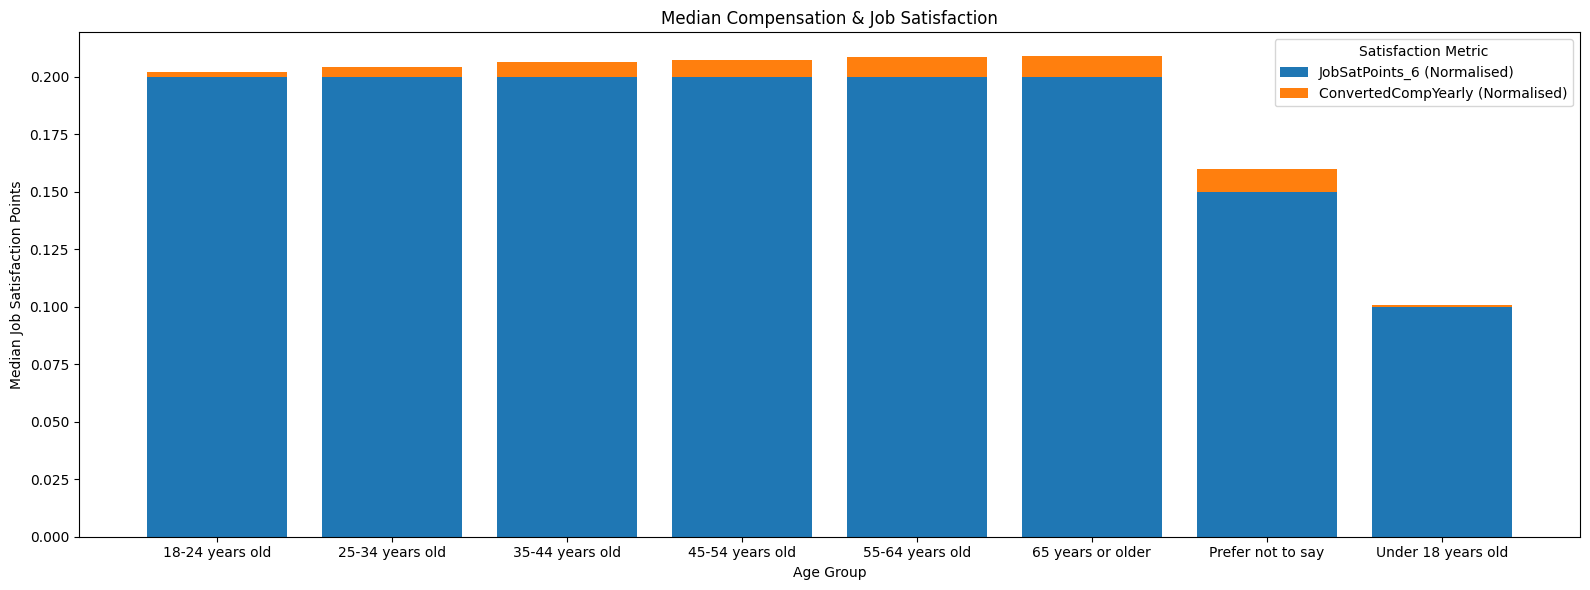

In [8]:
df_4 = df.copy().loc[:, ["Age", "JobSatPoints_6", "ConvertedCompYearly"]].dropna()

# Normalize JobSatPoints_6 and ConvertedCompYearly
df_4['JobSatPoints_6_normalized'] = (df_4['JobSatPoints_6'] - df_4['JobSatPoints_6'].min()) / (df_4['JobSatPoints_6'].max() - df_4['JobSatPoints_6'].min())
df_4['ConvertedCompYearly_normalized'] = (df_4['ConvertedCompYearly'] - df_4['ConvertedCompYearly'].min()) / (df_4['ConvertedCompYearly'].max() - df_4['ConvertedCompYearly'].min())

# Group by 'AgeGroups2' and calculate the median
median_df = df_4.groupby('Age', as_index=False).agg({"JobSatPoints_6_normalized":"median", "ConvertedCompYearly_normalized":"median"})

plt.figure(figsize=(16, 6))
plt.bar(
    x=median_df["Age"],
    height=median_df["JobSatPoints_6_normalized"],
    bottom=None,
    label="JobSatPoints_6 (Normalised)",
    color="tab:blue",
    width=0.8,
    align="center"
)

plt.bar(
    x=median_df["Age"],
    height=median_df["ConvertedCompYearly_normalized"],
    bottom=median_df["JobSatPoints_6_normalized"],
    label="ConvertedCompYearly (Normalised)",
    color="tab:orange",
    width=0.8,
    align="center"
)

plt.xlabel(xlabel="Age Group")
plt.ylabel(ylabel="Median Job Satisfaction Points")
plt.title(label="Median Compensation & Job Satisfaction")
plt.legend(loc='upper right', title='Satisfaction Metric')
plt.tight_layout()

plt.savefig("Lab 22 Plots/Task 2-2 Median Compensation & Job Satisfaction")
plt.show()

### Task 3: Comparing Data Using Stacked Charts


#### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


##### Wide-Format (Pivot Table)

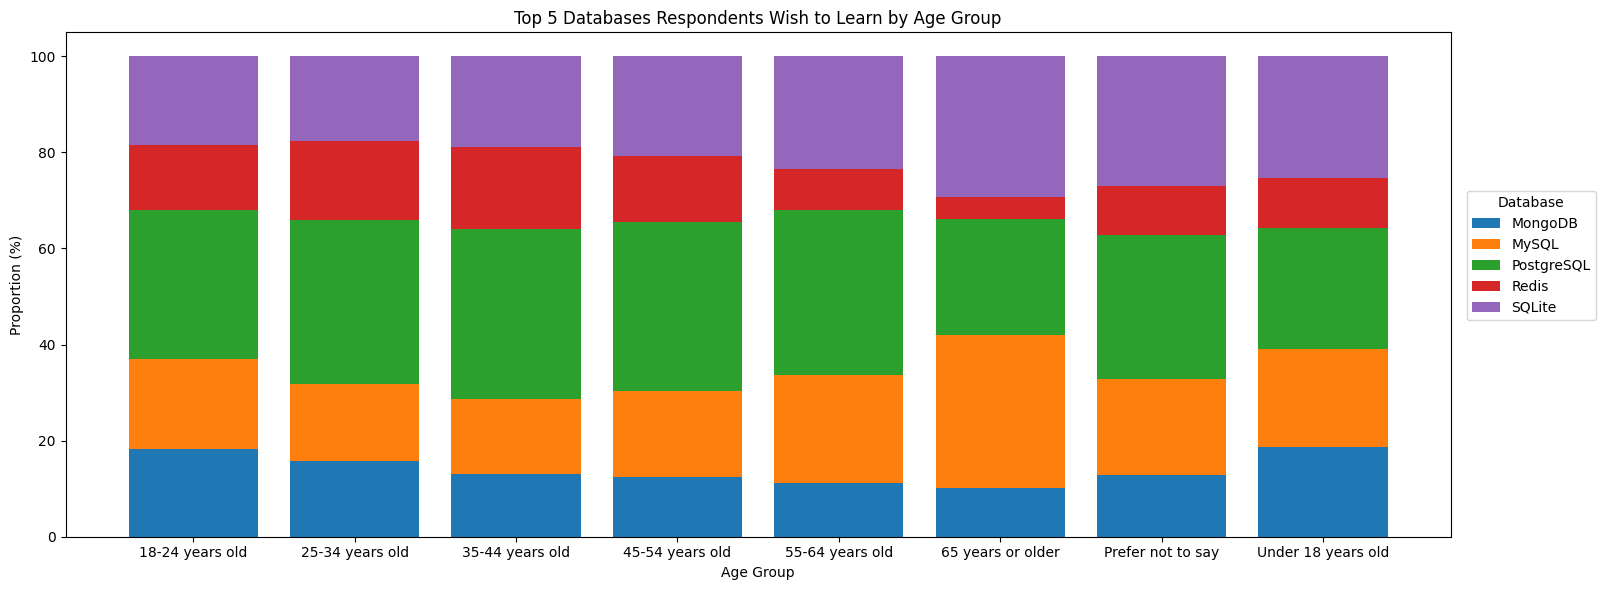

In [9]:
df_5 = df.copy().loc[:, ["Age", "DatabaseWantToWorkWith"]].dropna()

df_5["DatabaseWantToWorkWith"] = df_5["DatabaseWantToWorkWith"].str.split(";")
df_5_exploded = df_5.explode("DatabaseWantToWorkWith")

db_counts = df_5_exploded.groupby(by=["Age", "DatabaseWantToWorkWith"], as_index=False).size().rename(columns={"size": "Count"})
# db_counts

# Top 5 databases in total
top_dbs = db_counts.groupby(by="DatabaseWantToWorkWith")["Count"].sum().nlargest(5).index
# top_dbs

# Counts per top 5 databases per age group
counts_top = db_counts[db_counts["DatabaseWantToWorkWith"].isin(top_dbs)].copy()
# counts_top

pivot_df = counts_top.pivot(index="Age", columns="DatabaseWantToWorkWith", values="Count").fillna(0)
# pivot_df

# Convert to proportions per Age group
pivot_pct = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
# pivot_pct

plt.figure(figsize=(16, 6))
bottom_val=None
colors = plt.cm.tab10.colors

for i, db in enumerate(pivot_pct.columns):
    plt.bar(
        x=pivot_pct.index,
        height=pivot_pct[db],
        bottom=bottom_val,
        label=db,
        color=colors[i % len(colors)],
        width=0.8,
        align="center"
    )

    # Update bottom for stacking
    if bottom_val is None:
        bottom_val = pivot_pct[db]
    else:
        bottom_val = bottom_val + pivot_pct[db]


plt.xlabel(xlabel="Age Group")
plt.ylabel(ylabel="Proportion (%)")
plt.title(label="Top 5 Databases Respondents Wish to Learn by Age Group")
plt.legend(loc='upper right', title='Database', bbox_to_anchor=(1,-0.3,0.11,1))
plt.tight_layout()

plt.savefig("Lab 22 Plots/Task 3-1 Top 5 Databases Respondents Wish to Learn by Age Group (Pivot)",bbox_inches='tight')
plt.show()

##### Long Format (Seaborn)

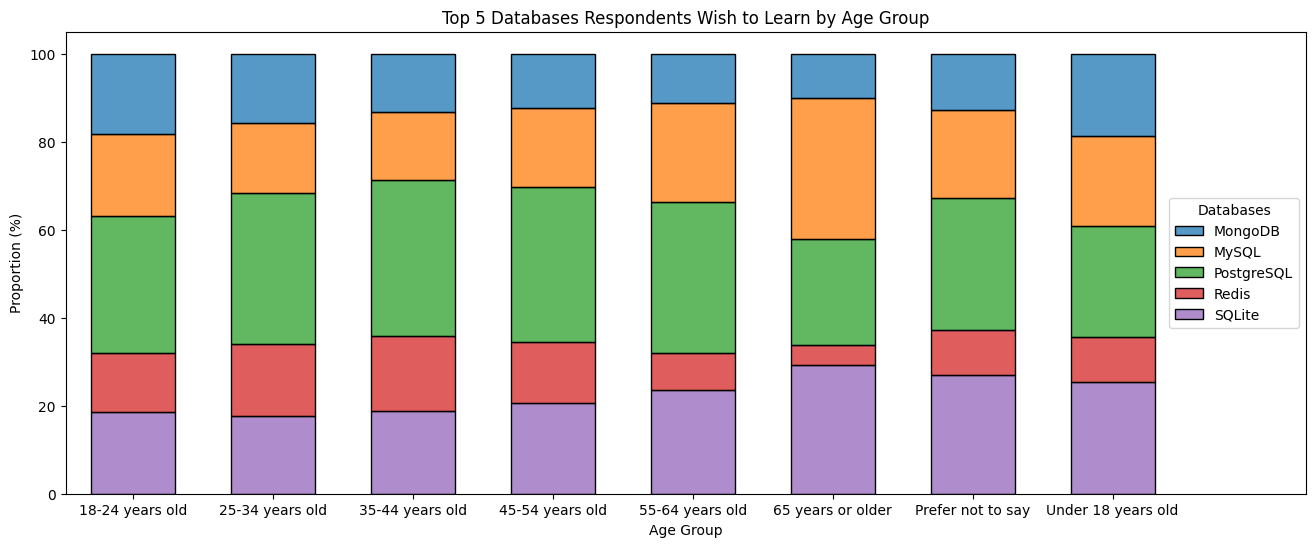

In [10]:
# Prepare long form with proportions
counts_top.loc[:,"Proportion"] = counts_top.groupby("Age")["Count"].transform(lambda x: (x / x.sum()) * 100)

plt.figure(figsize=(16,6))
ax = sns.histplot(
    data=counts_top,
    x="Age",
    hue="DatabaseWantToWorkWith",
    weights="Proportion",
    multiple="stack",       # stack to 100%
    palette="tab10",
    shrink=0.6,
    discrete=True,
    legend=True
)

leg = ax.get_legend()
leg.set_title("Databases")
leg.set_loc('center right')

xmin, xmax = ax.get_xlim()
plt.xlim(xmin+0.2, xmax+0.7)

plt.xlabel(xlabel="Age Group")
plt.ylabel(ylabel="Proportion (%)")
plt.title(label="Top 5 Databases Respondents Wish to Learn by Age Group")

plt.savefig("Lab 22 Plots/Task 3-1 Top 5 Databases Respondents Wish to Learn by Age Group (Long - Seaborn)")
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


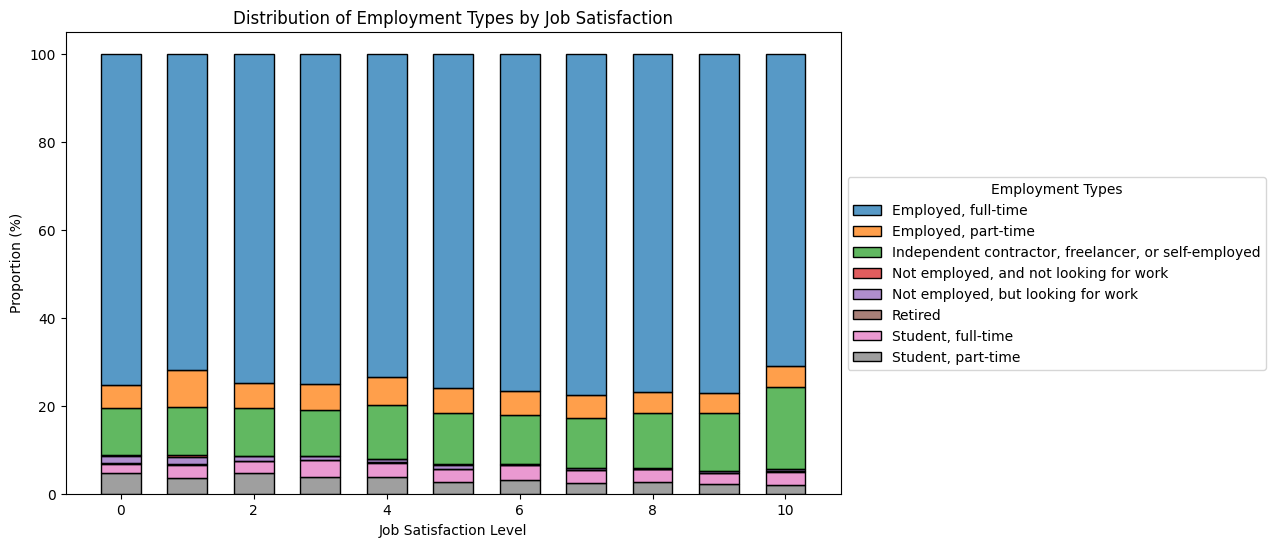

In [11]:
df_6 = df.copy().loc[:, ["Employment", "JobSat"]].dropna()

df_6["Employment"] = df_6["Employment"].str.split(";")
df_6 = df_6.explode("Employment")

df_6 = df_6.groupby(by=["JobSat","Employment"], as_index=False).size().rename(columns={"size": "Count"})

df_6.loc[:,"Proportion"] = df_6.copy().groupby("JobSat")["Count"].transform(lambda x: (x / x.sum()) * 100)

plt.figure(figsize=(10,6))
ax = sns.histplot(
    data=df_6,
    x="JobSat",
    hue="Employment",
    weights="Proportion",
    multiple="stack",       # stack to 100%
    palette="tab10",
    shrink=0.6,
    discrete=True,
    legend=True
)

leg = ax.get_legend()
leg.set_title("Employment Types")
leg.set_bbox_to_anchor((1,0,0,0.7))

# xmin, xmax = ax.get_xlim()
# plt.xlim(xmin+0.2, xmax+5)

plt.xlabel(xlabel="Job Satisfaction Level")
plt.ylabel(ylabel="Proportion (%)")
plt.title(label="Distribution of Employment Types by Job Satisfaction")

plt.savefig("Lab 22 Plots/Task 3-2 Distribution of Employment Types by Job Satisfaction",bbox_inches='tight')
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


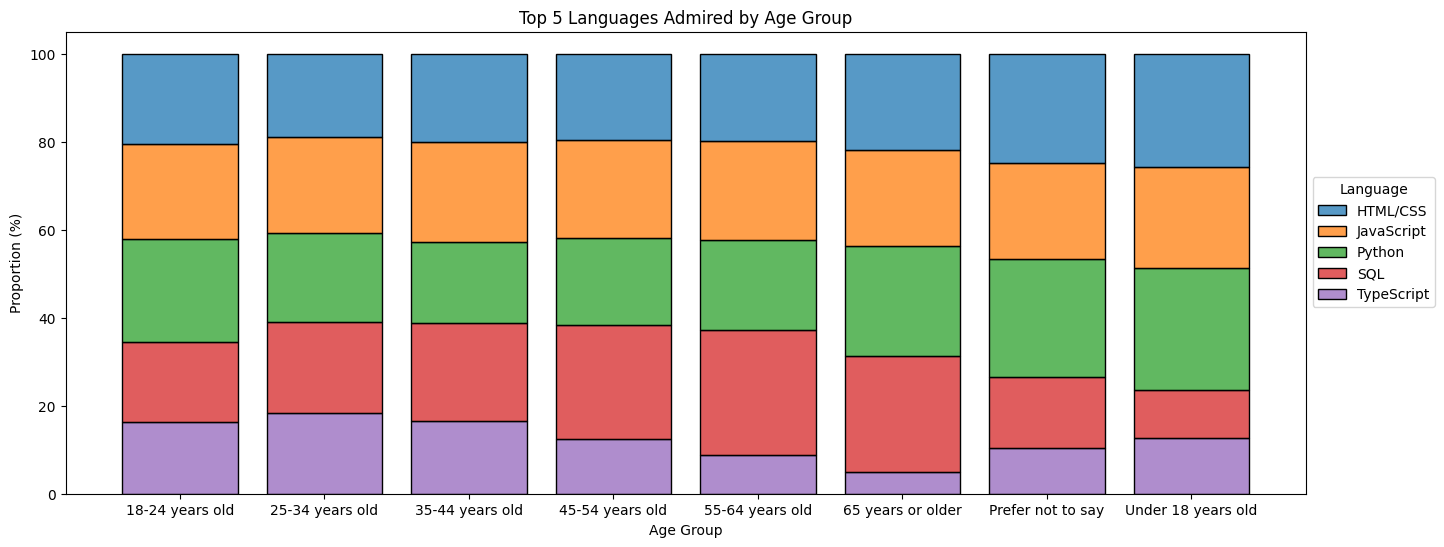

In [12]:
df_7 = df.copy().loc[:, ["LanguageAdmired", "Age"]].dropna()

df_7["LanguageAdmired"] = df_7["LanguageAdmired"].str.split(";")
df_7 = df_7.explode("LanguageAdmired")

df_7 = df_7.groupby(by=["Age", "LanguageAdmired"], as_index=False).size().rename(columns={"size": "Count"})

# Top 5 databases in total
top_langs = df_7.groupby(by="LanguageAdmired")["Count"].sum().nlargest(5).index
# top_dbs

# Counts per top 5 databases per age group
counts_top = df_7[df_7["LanguageAdmired"].isin(top_langs)].copy()

counts_top.loc[:,"Proportion"] = counts_top.groupby("Age")["Count"].transform(lambda x: (x / x.sum()) * 100)

plt.figure(figsize=(16,6))
ax = sns.histplot(
    data=counts_top,
    x="Age",
    hue="LanguageAdmired",
    weights="Proportion",
    multiple="stack",       # stack to 100%
    palette="tab10",
    shrink=0.8,
    discrete=True,
    legend=True
)

leg = ax.get_legend()
leg.set_title("Language")
leg.set_bbox_to_anchor((1,0,0,0.7))

plt.xlabel(xlabel="Age Group")
plt.ylabel(ylabel="Proportion (%)")
plt.title(label="Top 5 Languages Admired by Age Group")

plt.savefig("Lab 22 Plots/Task 4-1 Top 5 Languages Admired by Age Group",bbox_inches='tight')
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


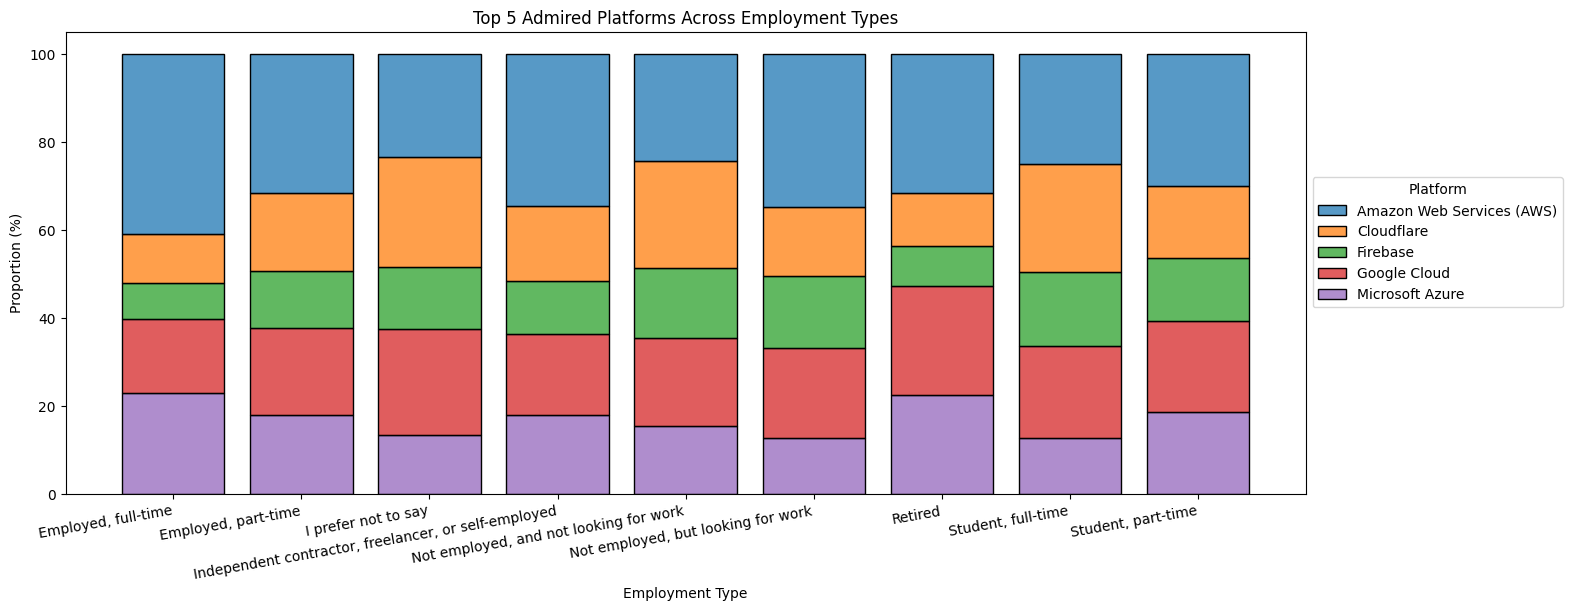

In [13]:
df_8 = df.copy().loc[:, ["PlatformAdmired", "Employment"]].dropna()

df_8["PlatformAdmired"] = df_8["PlatformAdmired"].str.split(";")
df_8 = df_8.explode("PlatformAdmired")

df_8["Employment"] = df_8["Employment"].str.split(";")
df_8 = df_8.explode("Employment")

df_8 = df_8.groupby(by=["Employment", "PlatformAdmired"], as_index=False).size().rename(columns={"size": "Count"})

# Top 5 databases in total
top_langs = df_8.groupby(by="PlatformAdmired")["Count"].sum().nlargest(5).index
# top_dbs

# Counts per top 5 databases per age group
counts_top = df_8[df_8["PlatformAdmired"].isin(top_langs)].copy()

counts_top.loc[:,"Proportion"] = counts_top.groupby("Employment")["Count"].transform(lambda x: (x / x.sum()) * 100)

plt.figure(figsize=(16,6))
ax = sns.histplot(
    data=counts_top,
    x="Employment",
    hue="PlatformAdmired",
    weights="Proportion",
    multiple="stack",       # stack to 100%
    palette="tab10",
    shrink=0.8,
    discrete=True,
    legend=True
)

leg = ax.get_legend()
leg.set_title("Platform")
leg.set_bbox_to_anchor((1,0,0,0.7))

plt.xticks(rotation=10, ha="right")
plt.xlabel(xlabel="Employment Type")
plt.ylabel(ylabel="Proportion (%)")
plt.title(label="Top 5 Admired Platforms Across Employment Types")

plt.savefig("Lab 22 Plots/Task 4-2 Top 5 Admired Platforms Across Employment Types",bbox_inches='tight')
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
